# TCSS 551 - Big Data -- TEAM 9
## Final project: King County Housing Data.


In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

%matplotlib inline  
import matplotlib.pyplot as plt  
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf


#### Custom function for standardizing the features.

Standardizing the variables is a very improtant step for multivariate analysis because variables measured at different scales do not contribute equally to the analysis. And often this is the case.

In [2]:
# Standardizing features
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

### Load the data set

Loading the data set and having a glance at the data

In [3]:
kc_df = pd.read_csv("kc_house_data.csv", parse_dates = ['date'])

# Specifying categorical varaibles
kc_df['waterfront'] = kc_df['waterfront'].astype('category', ordered=True)
kc_df['view'] = kc_df['view'].astype('category', ordered=True)
kc_df['condition'] = kc_df['condition'].astype('category', ordered=True)
kc_df['grade'] = kc_df['grade'].astype('category', ordered=False)
kc_df['yr_built'] = kc_df['yr_built'].astype('category', ordered=True)
kc_df['zipcode'] = kc_df['zipcode'].astype('category', ordered=False)

print("Shape of the data:")
print(kc_df.shape)
print()
print(kc_df.dtypes)
print()
kc_df.describe(include='all')

Shape of the data:
(21613, 21)

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront             category
view                   category
condition              category
grade                  category
sqft_above                int64
sqft_basement             int64
yr_built               category
yr_renovated              int64
zipcode                category
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.0,21613.0,...,21613.0,21613.000000,21613.000000,21613.0,21613.000000,21613.0,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,...,12.0,NaN,NaN,116.0,NaN,70.0,NaN,NaN,NaN,NaN
top,NaN,2014-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,7.0,NaN,NaN,2014.0,NaN,98103.0,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,21450.0,19489.0,...,8981.0,NaN,NaN,559.0,NaN,602.0,NaN,NaN,NaN,NaN
first,NaN,2014-05-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-05-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,NaN,NaN,...,NaN,1788.390691,291.509045,NaN,84.402258,NaN,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,NaN,NaN,...,NaN,828.090978,442.575043,NaN,401.679240,NaN,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,NaN,NaN,...,NaN,290.000000,0.000000,NaN,0.000000,NaN,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,NaN,NaN,...,NaN,1190.000000,0.000000,NaN,0.000000,NaN,47.471000,-122.328000,1490.000000,5100.000000


**Observations**

Looking at out target variable we can observe that the max price is atleast 10 times the price at the 3rd quantile, whereas, the price at 1st and 2nd quantile is respectively closer. This could suggest an outlier in the data or an enormous price for a particular house.

The 3rd Quantile for sqft_basement is zero. indicating that, there are less houses actually having a basement. And in almost all the sqft variables we can see that the max has a good spike. This could agian be the same case as above.

In [4]:
# Uncomment this ot take a look at the max values and where they're located.
# kc_df[kc_df.price == kc_df.price.max()]
# kc_df[kc_df.sqft_living == kc_df.sqft_living.max()]


In [5]:
# Checking for any null values which could raise an error for a model.
kc_df.isnull().values.any()

False

### Exploration of some feature values.

Here we explore some features based on intuition so as to observe their distribution.

In [6]:
# checking the unique values of latitude and longitude
print("Size of the Data:", len(kc_df.id))
print("Unique lat values", len(kc_df.lat.unique()))
print("Unique long values", len(kc_df.long.unique()))
print()
print("Standard deviation of latitude", np.std(kc_df.lat))
print("Standard deviation of longitude", np.std(kc_df.long))

Size of the Data: 21613
Unique lat values 5034
Unique long values 752

Standard deviation of latitude 0.13856050464082661
Standard deviation of longitude 0.14082508438917932


**Observation:**
Here we can observe that out of 16 features (excluding date and id) 'longitude' and 'latitude' although have some amount of different values, their standard deviation is very less and therfore intuitively their contribution to the price of the house could be insignificant.

On the other hand they could have a good correlation, we will have to assess it in the further steps.

### 1.2 Plotting the Price vs feature values.
This plot is to visually observe the trends in prices due to 16 most interesting features. Its a 4x4 plot.

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


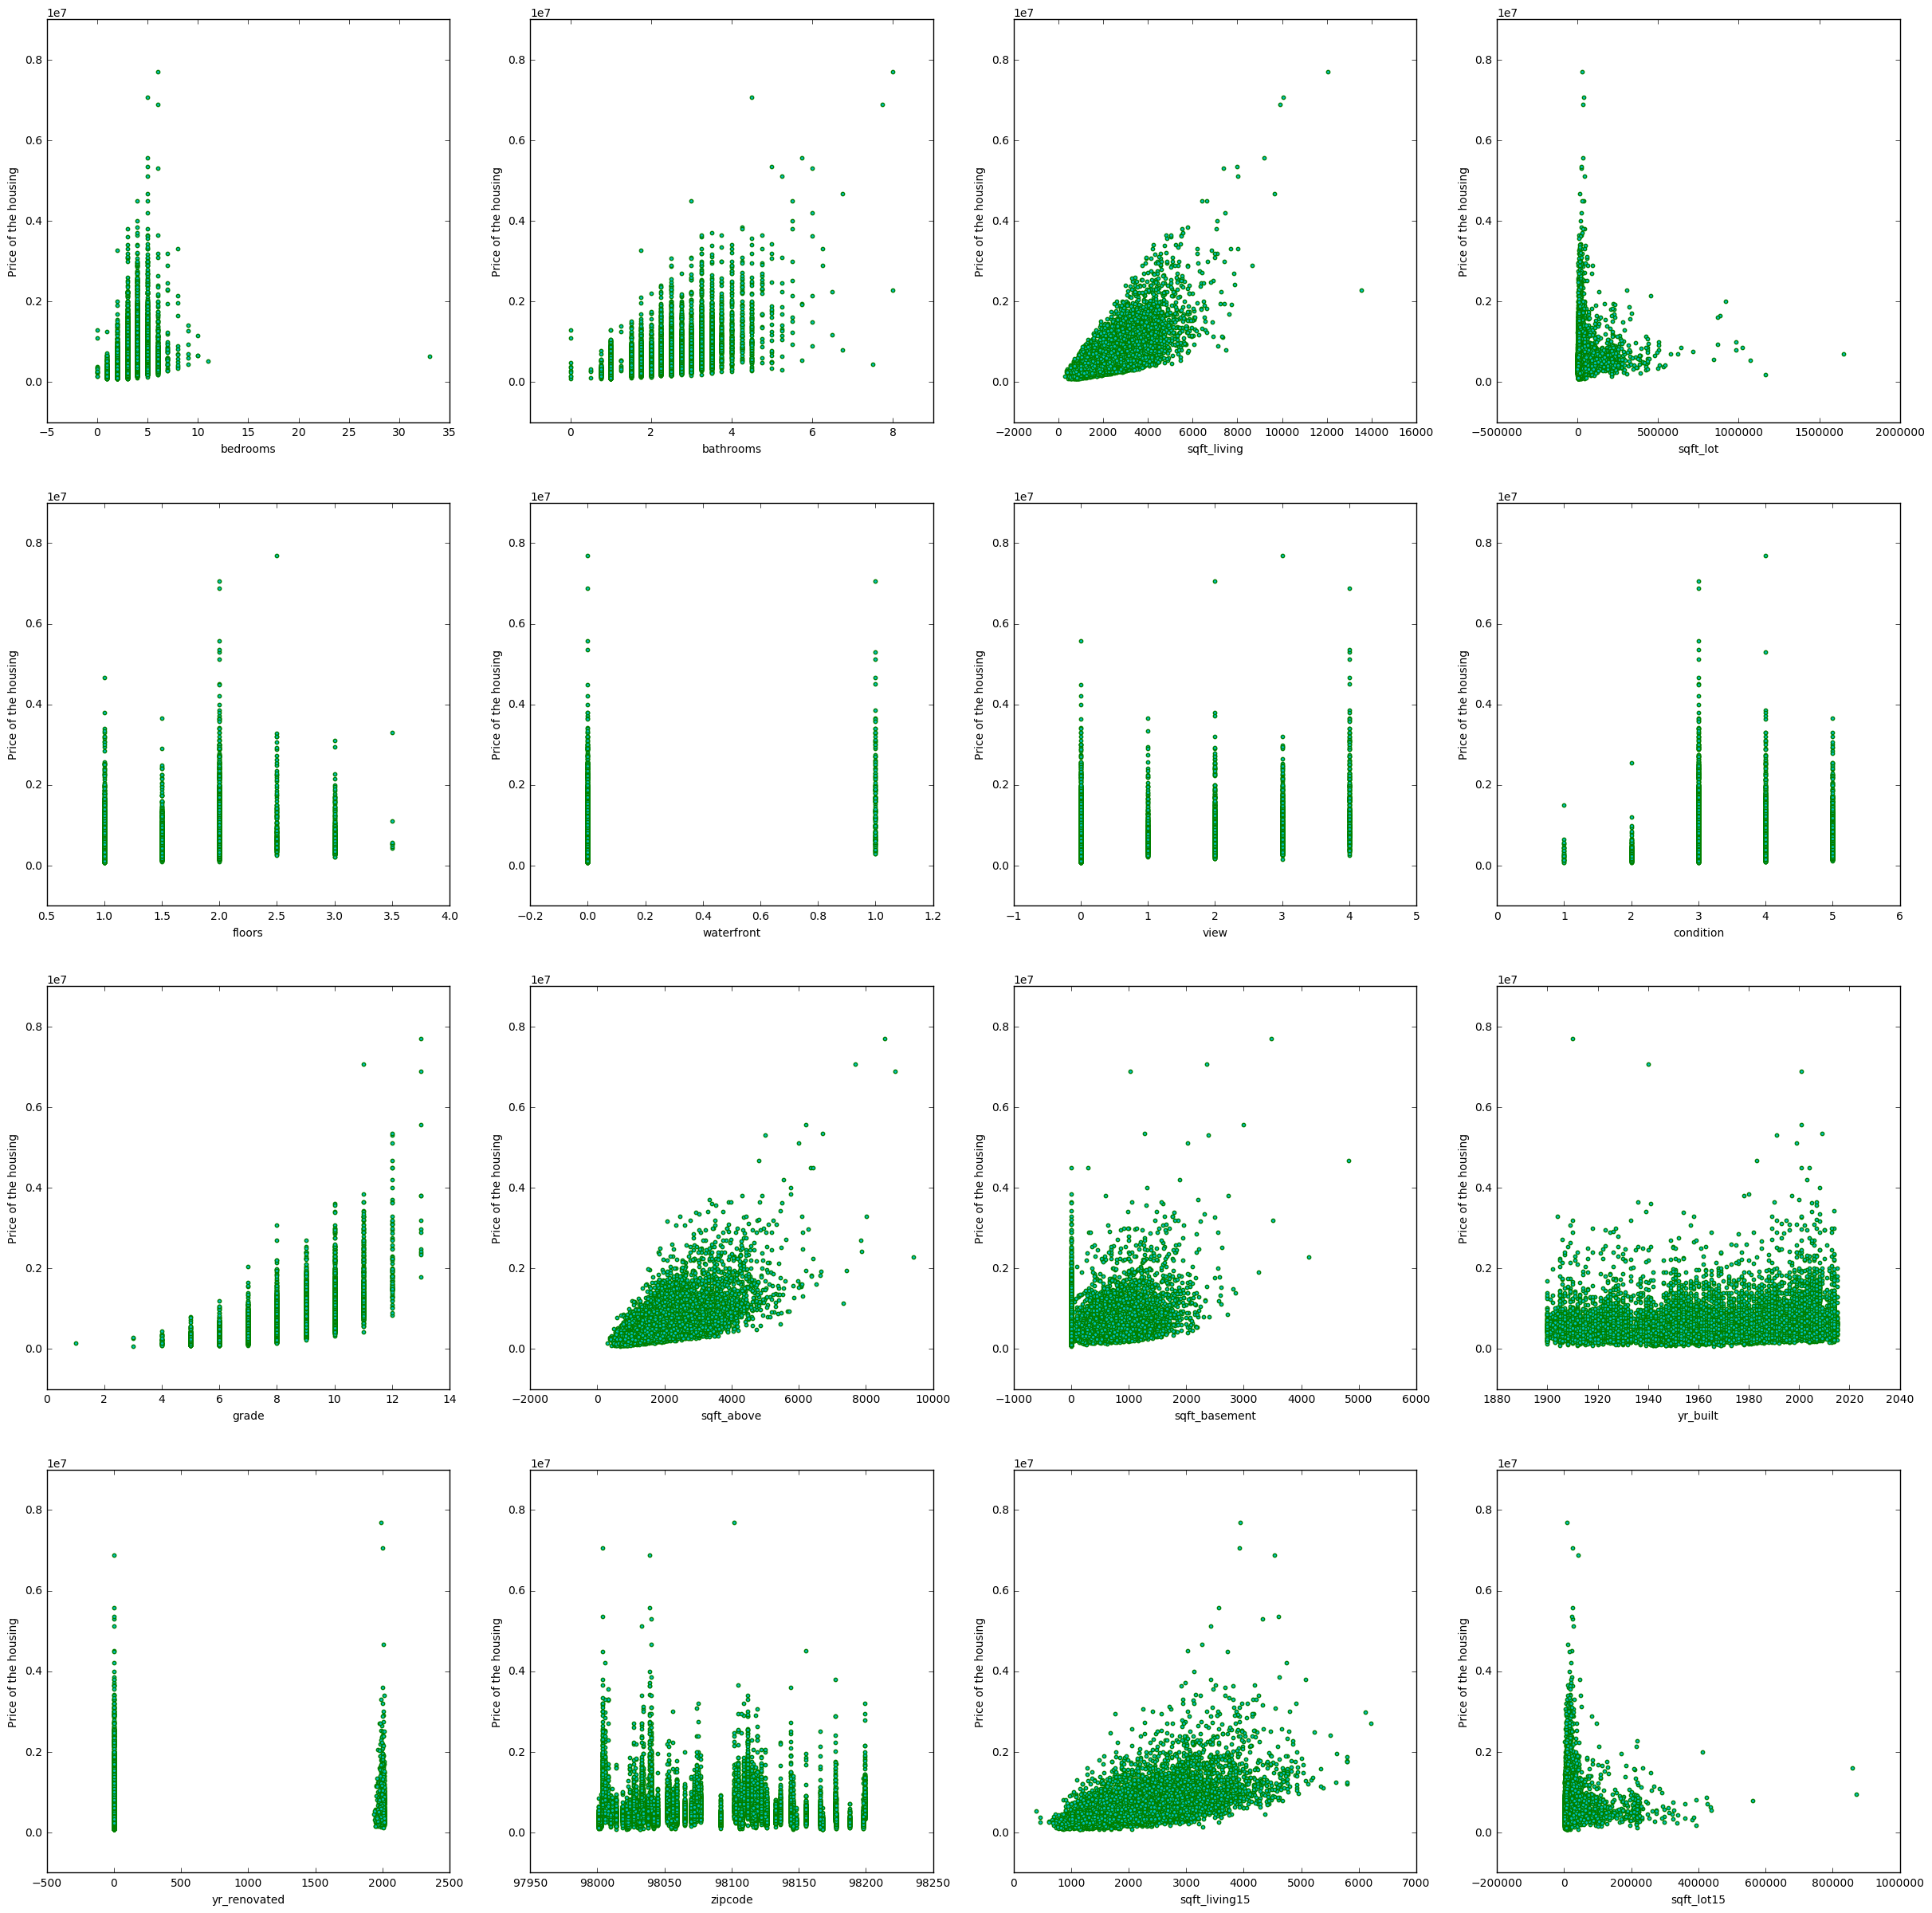

In [7]:
col_list = kc_df.columns
print(col_list)

# plotting all the features.
plt.figure(figsize=(30,30))

# remocing latititude and longitude from columnn
col = col_list[3:17]
col = col.append(col_list[19:])
y = kc_df.price
i=0
# print(len(kc_df.iloc[:,i]), len(y))

for j in range(4):
    for k in range(4):
        plt.subplot( 4, 4 ,4*j+k+1)
        plt.scatter(kc_df.ix[:,col[i]], y, c='c', edgecolor='g', s=10)        
        plt.xlabel(col[i])
        plt.ylabel("Price of the housing")
        i +=1


**Categorical values:**
1. condition
2. waterfornt(2)
3. view
4. grade
5. yr_renovated
6. zipcode

Fertures whose plot has a pattern against the Price of the housing:
1. sqft_living
2. sqft_above
3. sqft_living15

We can also observe that there is little effect of sqft_basement and the yr_renovated on the price. We can Create some new representaions of these variables into a category. This may give us a better effect on price.

In [8]:
# Whether basement exists or not.
kc_df['basement_present'] = kc_df['sqft_basement'].apply(lambda x:1 if x>0 else 0)
kc_df['basement_present'] = kc_df['basement_present'].astype('category', ordered=False)

# Whether renovation exists or not.
kc_df['renovated'] = kc_df['yr_renovated'].apply(lambda x:1 if x>0 else 0)
kc_df['renovated'] = kc_df['renovated'].astype('category', ordered=False)

### Scatter plots

Creating an 8x8 grid of scatter plot to see the relationship between different features and how they relatively occur with repect to each other.

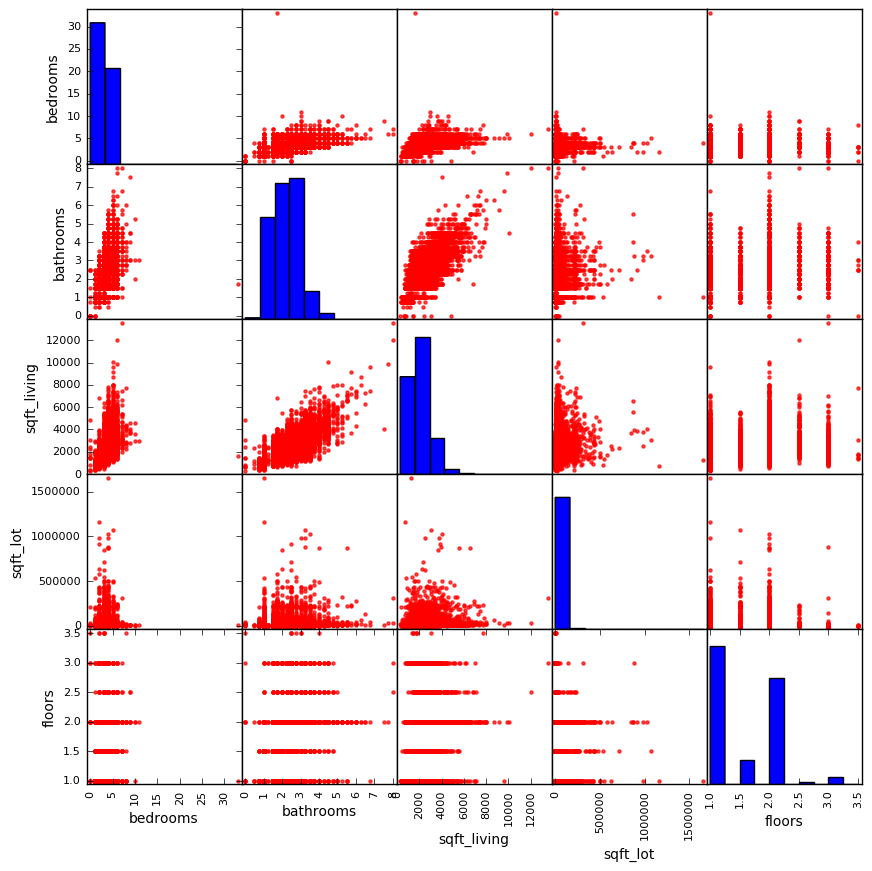

In [9]:
from pandas.tools.plotting import scatter_matrix

col_list = kc_df.columns
plt.figure(figsize=(20,20))
scatter_matrix(kc_df[col_list[3:12]], c='r', edgecolor='r',figsize=(10, 10), diagonal='hist', alpha = 0.7)
plt.show()

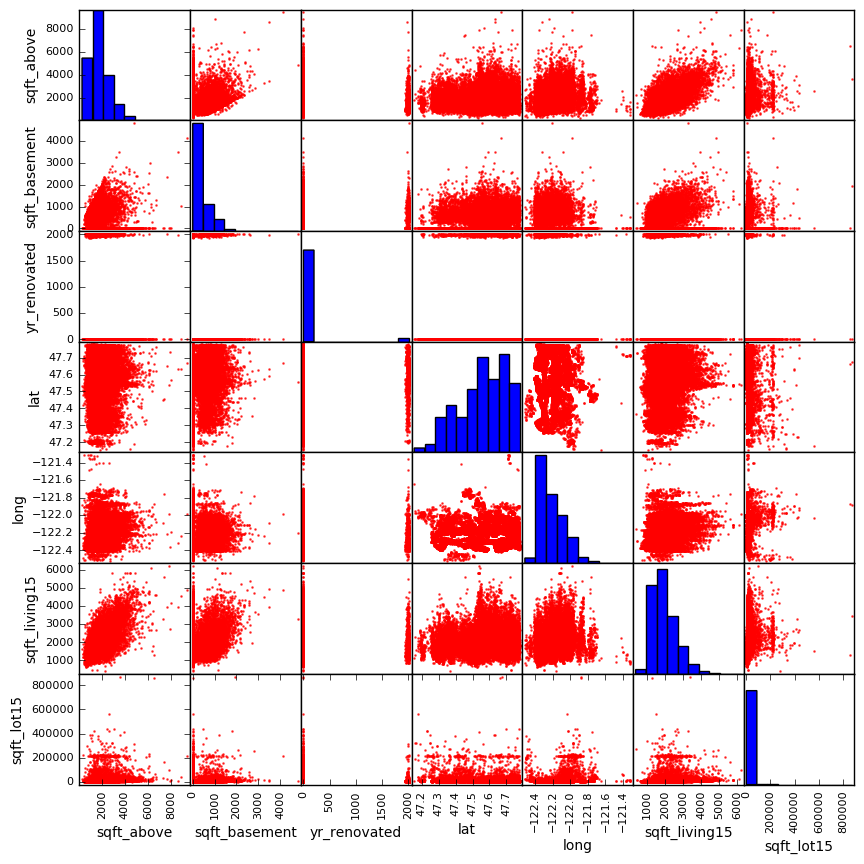

In [10]:
from pandas.tools.plotting import scatter_matrix

col_list = kc_df.columns
plt.figure(figsize=(20,20))
scatter_matrix(kc_df[col_list[12:]],c='r', edgecolor='r', figsize=(10, 10), diagonal='hist', alpha = 0.7, s=3)
plt.show()

**Observations:**

Although, most of the scatter plots are messy. we can observe that fitting linear model on it's own might infact generate an even greater errors becasue of the variance the data has. But we trying out a simple linear model will give us a baseline of erorrs.
Note: we can use some techniques to encompass the vairance in the data even with a linear model.

### Resolution:

We need to Standardize/Normalize the values before even passing onto the regresison model.
But more importantly we need to encode the categorical values in such a format which can fare with the regression model well.

**One-hot encoding**
One hot encoding transforms categorical features to a format that works better with classification and regression algorithms.
But to be simple we can relax as the built in regression functions will handle the categorical data as it is.

This technique is particularly helpful for features like zipcodes. because zipcodes cannot be compared in terms of magnitude.

In [11]:
# Additional steps : try one hot encoding, computer the difference
# Future steps

### 1.2 Calculating spearman correlation between the features and the target

Not the best way to go about this but we can get insights on how these features actually effect the target price. This quantifies the plots previously constructed.

In [12]:
# we can validate the above conclusions by running a corelation test on the data, whcih will be done in R
from scipy import stats

r, p = stats.spearmanr(kc_df['waterfront'], kc_df['price'])
print ('spearman correlation r between price and Waterfront is %s with p = %s' %(r,p))
r, p = stats.spearmanr(kc_df['yr_renovated'], kc_df['price'])

r, p = stats.spearmanr(kc_df['renovated'], kc_df['price'])
print ('spearman correlation r between price and renovated is %s with p = %s' %(r,p))

r, p = stats.spearmanr(kc_df['condition'], kc_df['price'])
print ('spearman correlation r between price and condition is %s with p = %s' %(r,p))
r, p = stats.spearmanr(kc_df['view'], kc_df['price'])
print ('spearman correlation r between price and view is %s with p = %s' %(r,p))
r, p = stats.spearmanr(kc_df['grade'], kc_df['price'])
print ('spearman correlation r between price and grade is %s with p = %s' %(r,p))

print()
r, p = stats.spearmanr(kc_df['sqft_living'], kc_df['price'])
print ('spearman correlation r between price and sqft_living is %s with p = %s' %(r,p))
r, p = stats.spearmanr(kc_df['sqft_above'], kc_df['price'])
print ('spearman correlation r between price and sqft_above is %s with p = %s' %(r,p))
r, p = stats.spearmanr(kc_df['sqft_basement'], kc_df['price'])
print ('spearman correlation r between price and sqft_basement is %s with p = %s' %(r,p))
r, p = stats.spearmanr(kc_df['sqft_lot'], kc_df['price'])
print ('spearman correlation r between price and sqft_lot is %s with p = %s' %(r,p))
r, p = stats.spearmanr(kc_df['condition'], kc_df['price'])
print ('spearman correlation r between price and condition is %s with p = %s' %(r,p))
r, p = stats.spearmanr(kc_df['bedrooms'], kc_df['price'])
print ('spearman correlation r between price and bedrooms is %s with p = %s' %(r,p))
r, p = stats.spearmanr(kc_df['bathrooms'], kc_df['price'])
print ('spearman correlation r between price and bathrooms is %s with p = %s' %(r,p))

spearman correlation r between price and Waterfront is 0.115089280287 with p = 1.25451422215e-64
spearman correlation r between price and renovated is 0.1010262967 with p = 3.85719951003e-50
spearman correlation r between price and condition is 0.0184899583013 with p = 0.00656082840655
spearman correlation r between price and view is 0.29393116417 with p = 0.0
spearman correlation r between price and grade is 0.658215221426 with p = 0.0

spearman correlation r between price and sqft_living is 0.644190982158 with p = 0.0
spearman correlation r between price and sqft_above is 0.541751592433 with p = 0.0
spearman correlation r between price and sqft_basement is 0.251704401175 with p = 1.53727055939e-309
spearman correlation r between price and sqft_lot is 0.0749393702846 with p = 2.67889268857e-28
spearman correlation r between price and condition is 0.0184899583013 with p = 0.00656082840655
spearman correlation r between price and bedrooms is 0.34465237096 with p = 0.0
spearman correlati

### Using Radnom Forests/decision trees to rank the features



building tree 1 of 40building tree 2 of 40
building tree 3 of 40
building tree 4 of 40

building tree 5 of 40
building tree 6 of 40
building tree 7 of 40
building tree 8 of 40
building tree 9 of 40
building tree 10 of 40
building tree 11 of 40
building tree 12 of 40
building tree 13 of 40
building tree 14 of 40
building tree 15 of 40
building tree 16 of 40
building tree 17 of 40
building tree 18 of 40
building tree 19 of 40
building tree 20 of 40
building tree 21 of 40
building tree 22 of 40
building tree 23 of 40
building tree 24 of 40
building tree 25 of 40
building tree 26 of 40
building tree 27 of 40
building tree 28 of 40


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.6s


building tree 29 of 40
building tree 30 of 40
building tree 31 of 40
building tree 32 of 40
building tree 33 of 40
building tree 34 of 40
building tree 35 of 40
building tree 36 of 40
building tree 37 of 40
building tree 38 of 40
building tree 39 of 40
building tree 40 of 40


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.8s finished
C:\Users\Yash\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


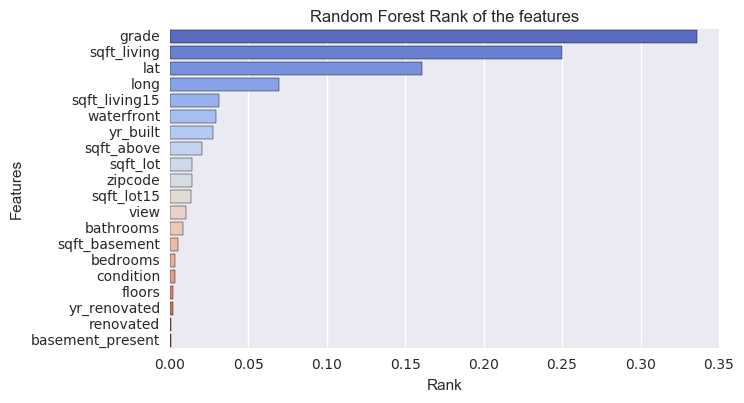

In [13]:
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

X = kc_df.drop(['price', 'id', 'date'], 1)
Y = kc_df.price

rf = RandomForestRegressor(n_jobs=-1, n_estimators=40, verbose=3)
rf.fit(X,Y)
# create a feature vs ranking table
rank_table = pd.DataFrame(columns = ['Features', 'Rank'])
rank_table['Features'] = X.columns
rank_table['Rank'] = rf.feature_importances_

# plotting the ranking graphically
rank_table = rank_table.sort('Rank', ascending=False)

rank_fig = sns.factorplot(x="Rank", y="Features", data = rank_table, kind="bar", size=4, aspect=1.9, palette='coolwarm')
sns.plt.title('Random Forest Rank of the features')
# rank_fig.savefig("Ranking of Features.png")

### Train and Test split + Linear Regression

Here we divide the data into training and test split.
Note: Since we're initially fitting a linear model we can skip the cross-validation.

In [14]:
# splitting using scikit learn
from sklearn.cross_validation import train_test_split
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

# # Considering the three variables mentioned above.
# X = kc_df[['sqft_living', 'sqft_above', 'sqft_basement', 'zipcode', 'bathrooms', 'grade', 'view']]
# Y = kc_df['price']

# splittin into 34% test and 66% training
kc_train, kc_test = train_test_split(kc_df, test_size=0.34, random_state=58)

# standardize values are giving a higher RMSE. have to look into this when tim permits.
# kc_train.sqft_living = standardize(kc_train.sqft_living)
# kc_train.sqft_above = standardize(kc_train.sqft_above)
# kc_train.sqft_basement = standardize(kc_train.sqft_basement)

# tried using log values to reduce the magnitude of price but that does not seem the right way to go.
# kc_train.price = np.log(kc_train.price)
# kc_train.sqft_living = np.log(kc_train.sqft_living)

lm1= smf.ols(formula='price ~ sqft_living + grade + sqft_living +sqft_above + sqft_basement ', data=kc_train).fit()

# this one gives a better rmse when we use interaction terms for important features
lmf= smf.ols(formula='price ~ sqft_living:grade + sqft_above:yr_built + lat:long + view:waterfront:sqft_living15', data=kc_train).fit()

pred = lm1.predict(kc_test)
kc_test['pred'] = pred
kc_test[['pred', 'price']]

print("Test:", rmse(pred, kc_test.price))

pred2 = lm1.predict(kc_train)
print("Train:", rmse(pred2, kc_train.price))
print()
print("-"*20)
print()
predf = lmf.predict(kc_test)
print("Test:", rmse(predf, kc_test.price))
predf2 = lmf.predict(kc_train)
print("Train:", rmse(predf2, kc_train.price))


C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Test: 234060.962218
Train: 235190.700336

--------------------

Test: 188938.11508
Train: 177440.898307


C:\Users\Yash\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


**Observations:**

Here we can see that on using ineraction terms for the top rated features, we're able to reduce the rmse by a good amount. But on displaying the prediciton we can see that it is not as much accurate as we'd have hoped.

### Overfitted result

Taking the log of price data and sqft-living to unearth an exponential relationsip between their relation.

In [15]:
# # taking log
# kc_train.price = np.log(kc_train.price)
# kc_test.price = np.log(kc_test.price)
# kc_train.sqft_living = np.log(kc_train.sqft_living)

# lm1= smf.ols(formula='price ~ sqft_living + grade + sqft_living:sqft_above + sqft_basement + grade + bathrooms', data=kc_train).fit()

# pred = lm1.predict(kc_test)
# kc_test['pred'] = pred
# kc_test[['pred', 'price']]

# print("Test:", rmse(pred, kc_test.price))

# pred2 = lm1.predict(kc_train)
# print("Train:", rmse(pred2, kc_train.price))
# print("Overfitted.!!!")

## PCA - Dimensionality reduction

In order to exploit some correlation within the data we can try to compress multiple correlated features as one and then use it as a potential predictor for our model. As the number of components increase more of the variance in the data is covered. so ideally, out of our 18 features, we can try upto 3 components.
Thereofore, we will project the entire feature space into a new 3 Dimensional space. And then runa linear model considering the only feature values across the new vectors in 3-D space.

#### Normalizing:

In [16]:
norm_df = kc_df.copy()
print(max(norm_df.sqft_living))
norm_df = norm_df.drop(['date', 'id', 'price'], 1)
for col in norm_df.columns:
    norm_df[str(col)] = standardize(norm_df[str(col)].as_matrix())
print(max(norm_df.sqft_living))

13540
12.4780651976


In [18]:
from sklearn.decomposition import PCA

# using normalized data
# pca_df = norm_df.copy()
# pca_df['price'] = kc_df['price']

# pca = PCA(n_components=3)
# pca_proj = (pca.fit_transform(pca_df))

pca_df = kc_df.copy()

pca = PCA(n_components=3)
pca_proj = (pca.fit_transform(pca_df.drop(['date', 'id'], 1)))

pca_df['proj1'] = pca_proj[:,0]
pca_df['proj2'] = pca_proj[:,1]
pca_df['proj3'] = pca_proj[:,2]

# Train and Test split for the new PCA dataframe
pcadf_train, pcadf_test = train_test_split(pca_df, test_size = 0.34, random_state = 12)

lm_fit= smf.ols(formula='price ~ proj1 +proj2 + proj3', data=pcadf_train).fit()

#Training and test predictions
pca_pred_train = lm_fit.predict(pcadf_train)
pca_pred_test = lm_fit.predict(pcadf_test)


# Make a pipeline for automatic projection into pca components
# kc_train1, kc_test1 = train_test_split(kc_df, test_size=0.34, random_state=58)
# pca_pred_test = lm_fit.predict(kc_test.drop(['id', 'date'], 1))



print ('Score of the Linear model with pca:')
print ('Training RMSE:', rmse(pca_pred_train, pcadf_train['price']))
print ('Testing RMSE:', rmse(pca_pred_test, pcadf_test['price']))

results_df = pd.DataFrame(columns=['Price', 'Prediction'])
results_df['Price'] = pcadf_test['price']
results_df['Prediction'] = pca_pred_test
results_df.head(20)


Score of the Linear model with pca:
Training RMSE: 2.29315652917
Testing RMSE: 2.2726672196


,Price,Prediction
2019,275000.0,275000.432277
3435,279000.0,278998.918109
15940,200500.0,200499.669142
9811,750000.0,749999.781575
18665,395000.0,395000.174169
16723,422000.0,421996.118668
12020,247000.0,246999.818732
4101,634800.0,634804.166283
6578,500000.0,499997.154474
17152,750000.0,750001.551881


On normalizing the values we're getting some inconsostent results. So, this test was conducted only on raw values.
We chose 3 components for our projections. we had to exclude the 'date' and 'id' features from the data as they're irrelevant for out target variable.
3 components have helped us in achieving a dramatic reduction in rmse.
5 components were also tried and it resulted in rmse of 0.8 on training and 2.27 on test. Which is technically overfitting. So, number of components were switched back to 3

## PCA with cross validation

Cross validation is used here to get a good estimate of the 'real' rmse and eradicate any differences in the data. This also removes any situation wherein some pattern or relation is present in the test data but not in the training data usually caused by a random chance.

In [ ]:
from sklearn.cross_validation import KFold
from sklearn.decomposition import PCA

pca_df2 = kc_df.copy()

pca2 = PCA(n_components=3)
pca_proj2 = (pca.fit_transform(pca_df.drop(['date', 'id'], 1)))
pca_df2['proj1'] = pca_proj2[:,0]
pca_df2['proj2'] = pca_proj2[:,1]
pca_df2['proj3'] = pca_proj2[:,2]

kf = KFold(pca_df2.shape[0], n_folds=10)

pca_train_rmse = []
pca_test_rmse = []


print(pca_df2.shape[0])
for train, test in kf:
    pcacv_train, pcacv_test = pca_df2.loc[train,:], pca_df2.loc[test,:]
    
    lm_fit_cv= smf.ols(formula='price ~ proj1 +proj2 + proj3', data=pcacv_train).fit()

    #Training and test predictions
    pca_pred_train_cv = lm_fit_cv.predict(pcacv_train)
    pca_pred_test_cv = lm_fit_cv.predict(pcacv_test)
    
    pca_train_rmse.append(rmse(pca_pred_train_cv, pcacv_train['price']))
    pca_test_rmse.append(rmse(pca_pred_test_cv, pcacv_test['price']))

print ('Score of the Linear model with pca:')
print ('Training RMSE:', sum(pca_train_rmse)/ 10)
print ('Testing RMSE:', sum(pca_test_rmse)/ 10)

**Conclusion**

Even though the rmse value doesn't change much, this gives us a more reliable value.